<a href="https://colab.research.google.com/github/ortall0201/Spotify-Playlist-Recommender-System-Using-NLP/blob/main/Manor/Spotify_playlist_EDA_Basic_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primary Data Structuring
* Dataset structure consists of four columns - user_id, artist, track name, and playlist name - given by the user
* Nevertheless it appeard that original file consisted of rows which some had many hyphens and quotation marks, making them appear as being of more or less than 4 columns.
* This was dealt with keeping the lines that were made of four elements, and then ensuring each element was indeed what it was intended to be.



In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/spotify_dataset.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

# First step - keeping rows of 4 elements only

# List to store valid rows
valid_rows = []

# Open the CSV file and filter for rows with 4 columns
with open(csv_file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header
    for row in reader:
        if len(row) == 4:  # Keep only rows with exactly 4 columns
            valid_rows.append(row)

# Convert valid rows to a DataFrame
df_valid = pd.DataFrame(valid_rows, columns=headers)

print(len(df_valid))

# Display the first few rows
df_valid.head(10)



KeyboardInterrupt: 

In [ ]:
# Second step - Dealing with single quotation marks (sign of corrupt line)

# Remove adjacent double quotation marks ("") in all rows and columns
df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)

# Filter rows where any column contains a single quotation mark - sign of a corrupted line (")
rows_with_quotes = df_cleaned[df_cleaned.apply(lambda x: x.astype(str).str.contains('"').any(), axis=1)]

# Count the number of corrupted rows
print(f"Number of rows containing single quotation mark: {len(rows_with_quotes)}")

# Display df after cleaning
rows_with_quotes

<ipython-input-10-06fd0373b33a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)


KeyboardInterrupt: 

In [ ]:
# Subtract rows_with_quotes from df_cleaned
df_no_quotes = df_cleaned[~df_cleaned.index.isin(rows_with_quotes.index)]

# Display the result
print(df_no_quotes)

# Count the number of remaining rows
print(f"Number of rows in clean dataset: {len(df_no_quotes)}")


In [ ]:
pip install unidecode


In [ ]:
# Third step - Standartizing text to ASCII

import unidecode

# Function to remove non-ASCII characters
def unify_to_ascii(text):
    if isinstance(text, str):
        return unidecode.unidecode(text)
    return text

# Apply to the entire DataFrame
df_cleaned_final = df_no_quotes.applymap(unify_to_ascii)

# Display a sample
print(df_cleaned_final.head())


In [ ]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

In [ ]:
# optional step after resetting runtime

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'

Mounted at /content/drive


In [ ]:
df_cleaned_final = pd.read_csv(df_cleaned_final)

In [ ]:
# 4th step - Adjusting column names

df_cleaned_final.columns = ['user_id', 'artist_name', 'track_name', 'playlist_name']


In [ ]:
df_cleaned_final.sample(5)

,user_id,artist_name,track_name,playlist_name
7850139,00909b16e60501d9da9acf7bd2c5b00d,Clifford Brown & Max Roach Quintet,I Don't Stand A Ghost Of A Chance With You,Brownie Speaks with others
11493754,5711c5c6e1e476930378248a69f4f4a3,Florence + The Machine,Dog Days are Over,happy happy love time
10033549,9ff7ed4b2a9864fa42524ea0ce787e34,REO Speedwagon,Keep On Loving You,Vice City - Emotion 98.3
4870277,767bd9e933b8a46e56df7a8802049ec9,Monty,Turn To Me - Original Mix,Dub Step Collection
2456461,5f801dc79f3c9012505226b71fa44fb5,Alkaline Trio,Private Eye,DK Favorites


# Data Cleaning and preliminary preprocessing

In [ ]:
#Data Cleaning and lowercasing

import pandas as pd

# Step 1: Handle missing values
print(f"Shape Before Cleaning {df_cleaned_final.shape}")
df_cleaned_final = df_cleaned_final.dropna()  # Remove rows with missing values
print(f"Shape After Dropping NA {df_cleaned_final.shape}")
print("")

# Step 2: Convert all string columns to lowercase
string_columns = df_cleaned_final.select_dtypes(include='object').columns  # Identify string columns
df_cleaned_final[string_columns] = df_cleaned_final[string_columns].apply(lambda col: col.str.lower())
print(f"Shape After Converting to Lowercase {df_cleaned_final.shape}")
print("")

# Step 3: Remove duplicate Rows
print(f"Number of duplicate rows: {df_cleaned_final.duplicated().sum()}")
df_cleaned_final = df_cleaned_final.drop_duplicates()
print(f"Shape After Dropping Duplicates {df_cleaned_final.shape}")
print("")

# Step 4: Removing one-char artists and track names
print(df_cleaned_final[df_cleaned_final['artist_name'].str.len() < 2])  # Artists with very short names
print(df_cleaned_final[df_cleaned_final['track_name'].str.len() < 2])  # Tracks with very short names
df_cleaned_final = df_cleaned_final[df_cleaned_final['artist_name'].str.len() >= 2]
df_cleaned_final = df_cleaned_final[df_cleaned_final['track_name'].str.len() >= 2]
print(f"Shape After Removing Short Artists and Tracks {df_cleaned_final.shape}")
print("")




Shape Before Cleaning (12823403, 4)
Shape After Dropping NA (12779965, 4)

Shape After Converting to Lowercase (12779965, 4)

Number of duplicate rows: 29505
Shape After Dropping Duplicates (12750460, 4)

                                   user_id artist_name  \
14108     650c4d63a819dbb77cc15a87f407039a               
45019     db937456654d2465292c4daa947c95de           m   
49502     db937456654d2465292c4daa947c95de           t   
51893     db937456654d2465292c4daa947c95de           m   
77239     6cdb890a9fff57be31b072777350e632           x   
...                                    ...         ...   
12785766  675687eafb4c14f1ea561e6089ee2ec0           x   
12786002  675687eafb4c14f1ea561e6089ee2ec0           x   
12786173  675687eafb4c14f1ea561e6089ee2ec0           x   
12786684  675687eafb4c14f1ea561e6089ee2ec0           x   
12787412  675687eafb4c14f1ea561e6089ee2ec0           x   

                                         track_name          playlist_name  
14108                

In [ ]:
# New Feature - song name = artist + track

df_cleaned_final['song_name'] = df_cleaned_final['artist_name'] + ' - ' + df_cleaned_final['track_name']

#Ensures that duplicate entries (same artist and track combination) are not counted multiple times.
unique_songs = df_cleaned_final['song_name'].nunique()


#For example: Ed Sheeran +	Shape of You=	Ed Sheeran - Shape of You"
#Prevents ambiguity when multiple artists have songs with the same name
# 2,658,530 unique_songs



KeyboardInterrupt: 

In [ ]:
#print(f"Number of unique songs: {unique_songs}")

Number of unique songs: 2658530


In [ ]:
# New Feature unq_playlist_name = user_id + playlist

df_cleaned_final['unq_playlist_name'] = df_cleaned_final['user_id'] + ' - ' + df_cleaned_final['playlist_name']
unique_playlists = df_cleaned_final['unq_playlist_name'].nunique()
print(f"Number of unique playlists: {unique_playlists}")



Number of unique playlists: 230708


In [ ]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

# Optional Starting point - Call the current preprocesed data from here

In [ ]:
import pandas as pd

# Unfortunately, you should download the file to your drive
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingly

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)


In [ ]:
df_cleaned_final.shape

(12744063, 6)

In [ ]:
df_cleaned_final.head()

,user_id,artist_name,track_name,playlist_name,song_name,unq_playlist_name
0,9cc0cfd4d7d7885102480dd99e7a90d6,elvis costello,(the angels wanna wear my) red shoes,hard rock 2010,elvis costello - (the angels wanna wear my) re...,9cc0cfd4d7d7885102480dd99e7a90d6 - hard rock 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,elvis costello & the attractions,"(what's so funny 'bout) peace, love and unders...",hard rock 2010,elvis costello & the attractions - (what's so ...,9cc0cfd4d7d7885102480dd99e7a90d6 - hard rock 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,tiffany page,7 years too late,hard rock 2010,tiffany page - 7 years too late,9cc0cfd4d7d7885102480dd99e7a90d6 - hard rock 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,elvis costello & the attractions,accidents will happen,hard rock 2010,elvis costello & the attractions - accidents w...,9cc0cfd4d7d7885102480dd99e7a90d6 - hard rock 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,elvis costello,alison,hard rock 2010,elvis costello - alison,9cc0cfd4d7d7885102480dd99e7a90d6 - hard rock 2010


# Numbers and Distributions

In [ ]:
# Number of unique artists

df_cleaned_final['artist_name'].nunique()
print(f"Number of unique artists: {df_cleaned_final['artist_name'].nunique()}")

# Number of unique users

unique_users = df_cleaned_final['user_id'].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique artists: 279658
Number of unique users: 15898


## Songs per playlists

In [ ]:
# Songs per playlists
songs_per_playlist = df_cleaned_final.groupby(['unq_playlist_name'])['song_name'].nunique()

# Descriptive statistics
mean_songs = songs_per_playlist.mean()
mode_songs = songs_per_playlist.mode()
quantiles = songs_per_playlist.quantile([0.25, 0.5, 0.75])

print(f"Mean songs per playlist: {mean_songs:.2f}")
print(f"Mode songs per playlist: {mode_songs}")
print(f"25th percentile: {quantiles[0.25]}, Median: {quantiles[0.5]}, 75th percentile: {quantiles[0.75]}")


Mean songs per playlist: 55.24
Mode songs per playlist: 0    12
Name: song_name, dtype: int64
25th percentile: 11.0, Median: 16.0, 75th percentile: 38.0


In [ ]:
songs_per_playlist

,song_name
unq_playlist_name,
00055176fea33f6e027cd3302289378b - favs,119
0007f3dd09c91198371454c608d47f22 - 2014,8
0007f3dd09c91198371454c608d47f22 - fav songs,87
0007f3dd09c91198371454c608d47f22 - sad songs,2
000b0f32b5739f052b9d40fcc5c41079 - agnetha faltskog,2
...,...
fff616055993498d6127f3f467cf9f2b - say you love me,12
fff616055993498d6127f3f467cf9f2b - summer,362
fff616055993498d6127f3f467cf9f2b - sunday alt.,508


In [ ]:
# Playlist Diversity
playlist_diversity = df_cleaned_final.groupby('unq_playlist_name')['song_name'].nunique()
print(playlist_diversity.describe())

count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


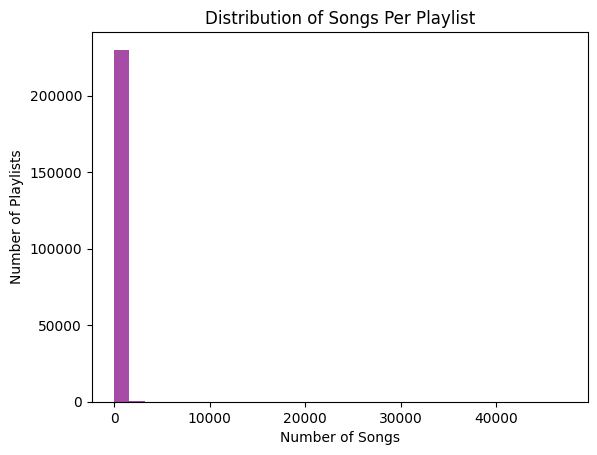

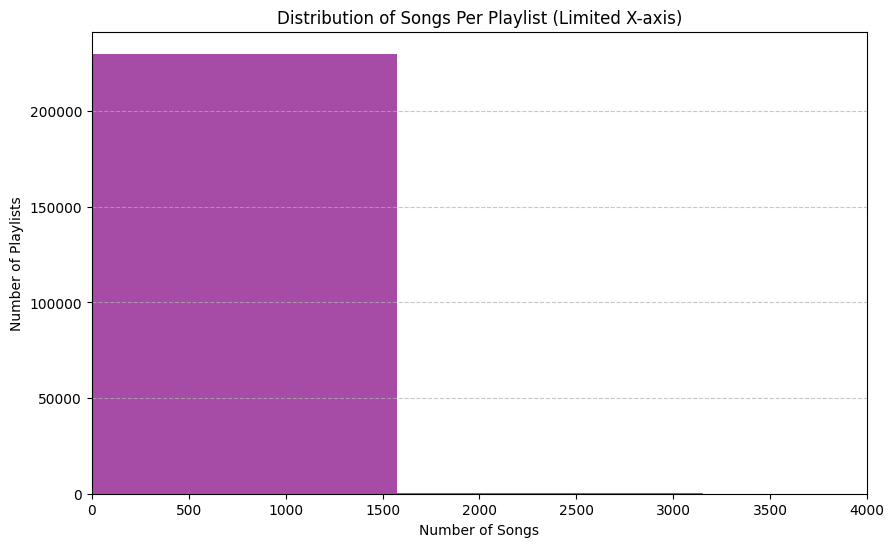

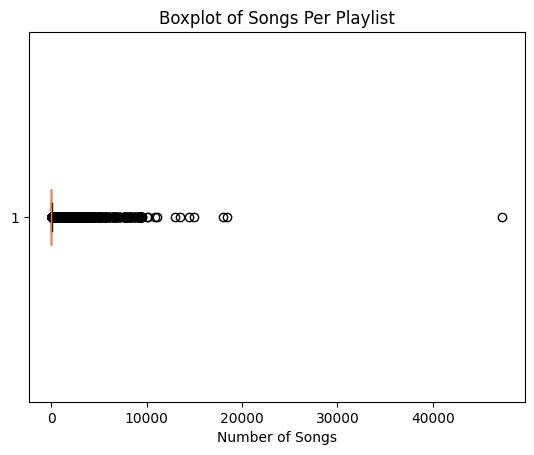

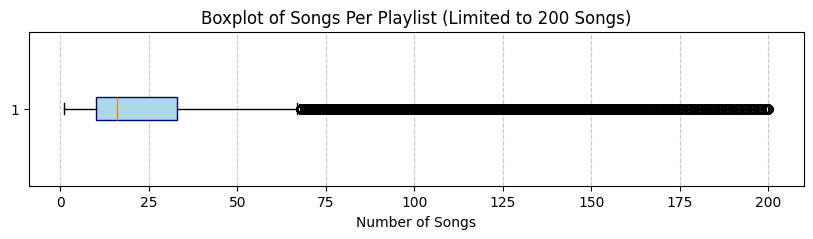

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Histogram for song distribution
plt.hist(songs_per_playlist, bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Songs Per Playlist")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Playlists")
plt.show()


# Histogram for song distribution with limited X-axis to 4000
plt.figure(figsize=(10, 6))
plt.hist(songs_per_playlist, bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Songs Per Playlist (Limited X-axis)")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Playlists")
plt.xlim(0, 4000)  # Limit X-axis to 4000
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Boxplot for song distribution with limited X-axis
plt.figure(figsize=(10, 2))
plt.boxplot(songs_per_playlist[songs_per_playlist <= 200], vert=False, patch_artist=True,
            boxprops=dict(color="navy", facecolor="lightblue"))
plt.title("Boxplot of Songs Per Playlist (Limited to 200 Songs)")
plt.xlabel("Number of Songs")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



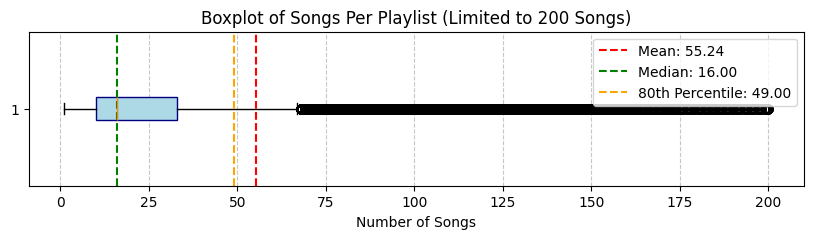

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and median for the entire dataset
mean_value = songs_per_playlist.mean()
median_value = songs_per_playlist.median()
percentile_80 = np.percentile(songs_per_playlist, 80)

# Create the boxplot (limit display to playlists with <= 200 songs for visualization purposes)
plt.figure(figsize=(10, 2))
plt.boxplot(songs_per_playlist[songs_per_playlist <= 200], vert=False, patch_artist=True,
            boxprops=dict(color="navy", facecolor="lightblue"))

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axvline(percentile_80, color='orange', linestyle='--', label=f'80th Percentile: {percentile_80:.2f}')

# Add title, labels, and legend
plt.title("Boxplot of Songs Per Playlist (Limited to 200 Songs)")
plt.xlabel("Number of Songs")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')  # Add legend for mean and median

# Show the plot
plt.show()



## Songs per artist

In [ ]:
track_details_per_artist = df_cleaned_final.groupby('artist_name').agg({'song_name': ['nunique', list]})
track_details_per_artist.columns = ['unique_song_count', 'song_names_list']

# Sort in descending order (most songs first)
sorted_by_song_count_desc = track_details_per_artist.sort_values(by='unique_song_count', ascending=False)
sorted_by_song_count_desc.head(10)

,unique_song_count,song_names_list
artist_name,,
various artists,6725,"[various artists - i fancy laura marling, vari..."
johann sebastian bach,6303,"[johann sebastian bach - air, johann sebastian..."
wolfgang amadeus mozart,4510,[wolfgang amadeus mozart - piano sonata no. 11...
vitamin string quartet,3597,[vitamin string quartet - jack and sally monta...
grateful dead,3378,[grateful dead - box of rain - remastered vers...
frank sinatra,2966,"[frank sinatra - serenade in blue, frank sinat..."
ella fitzgerald,2845,"[ella fitzgerald - dream a little dream of me,..."
ludwig van beethoven,2425,"[ludwig van beethoven - fur elise, ludwig van ..."
lata mangeshkar,2419,"[lata mangeshkar - tujhe dekha to yeh, lata ma..."


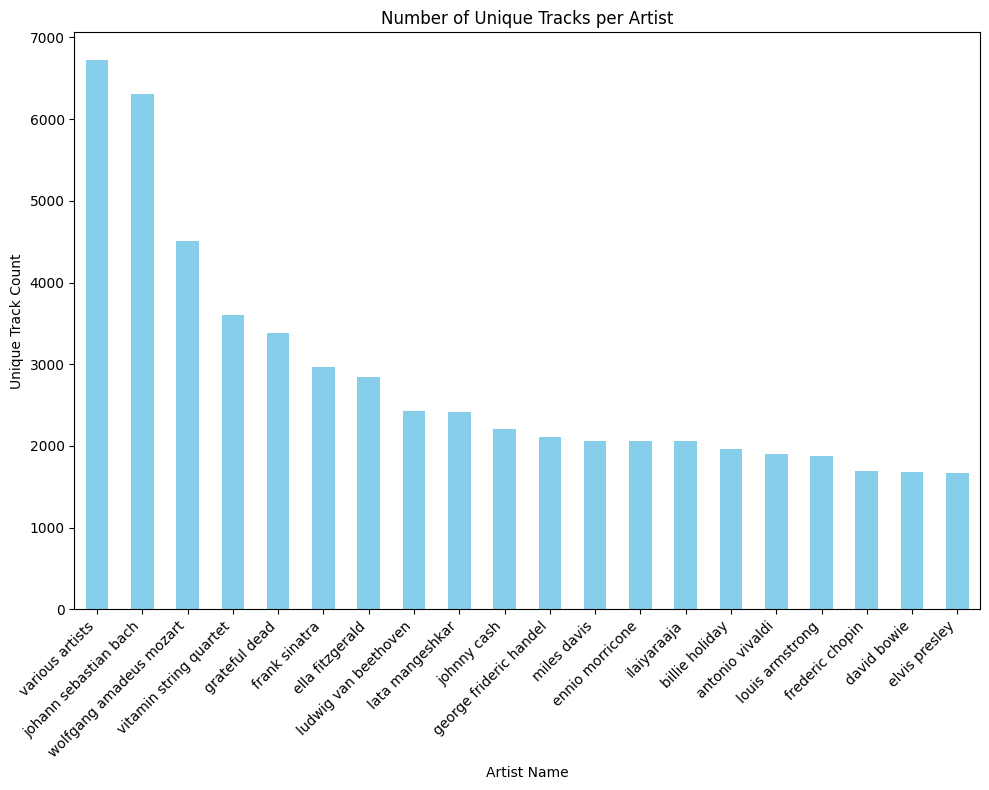

In [ ]:
from matplotlib import pyplot as plt

# Plotting the sorted data
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sorted_by_song_count_desc['unique_song_count'].head(20).plot(kind='bar', color='skyblue')  # Plot top 20 artists

plt.title('Number of Unique Tracks per Artist')
plt.xlabel('Artist Name')
plt.ylabel('Unique Track Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Playlists Lengths

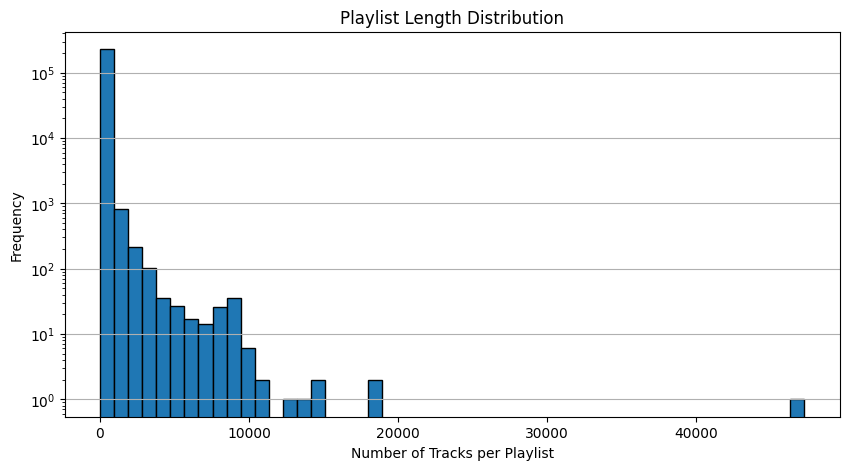

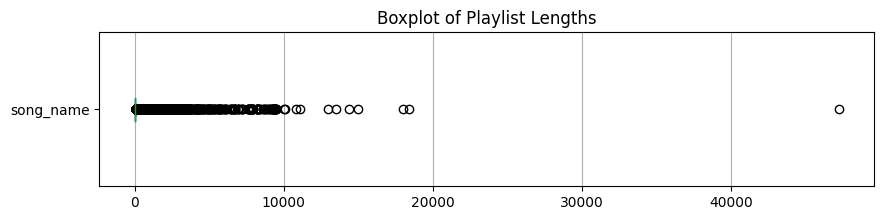

Playlist Length Statistics:
count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Calculate playlist lengths
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()

# Save the playlist lengths for reference
playlist_lengths.to_csv('playlist_lengths.csv')

# Plot histogram for playlist lengths
plt.figure(figsize=(10, 5))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
playlist_lengths.plot(kind='box', vert=False)
plt.title('Boxplot of Playlist Lengths')
plt.grid(axis='x')
plt.show()

# Basic statistics of playlist lengths
print("Playlist Length Statistics:")
print(playlist_lengths.describe())


In [ ]:
import matplotlib.pyplot as plt
"""
I dont agree with the Conservative/modorate/liberal Threshold here.
100 Threshold is not conservative,
As the descriptive satistics shows  80% of the playlisst have no more than 50 tracks
Therefore, around 50-60 Threshold is liberal



# Plot histogram of playlist lengths
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()
plt.figure(figsize=(10, 6))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.axvline(x=100, color='red', linestyle='--', label='Conservative Threshold (100)')
plt.axvline(x=500, color='green', linestyle='--', label='Moderate Threshold (500)')
plt.axvline(x=1000, color='blue', linestyle='--', label='Liberal Threshold (1000)')
plt.title('Distribution of Playlist Lengths')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


SyntaxError: incomplete input (<ipython-input-41-7dcee0d3f114>, line 2)

# Summary

In [ ]:
# Analyze unique values in columns
df_cleaned_final.nunique()

,0
user_id,15898
artist_name,279658
track_name,1854971
playlist_name,143640
song_name,2658530
unq_playlist_name,230708


In [ ]:
# Describe the dataset
df_cleaned_final.describe(include='all')

,user_id,artist_name,track_name,playlist_name,song_name,unq_playlist_name
count,12744063,12744060,12744048,12744063,12744063,12744063
unique,15898,279658,1854971,143640,2658530,230708
top,4398de6902abde3351347b048fcdc287,daft punk,intro,starred,m83 - midnight city,4398de6902abde3351347b048fcdc287 - starred
freq,294764,35935,6709,1327148,2605,47259


# Steps for further preprocessing of the data



* removing outliers - playlists of many songs, playlists of few songs
* removing "various artists" songs
* capping playlists from certain lengths
* tokenizing playlists

#### note - for reducing data volume, you can safely remove the "playlist_name" and "track_name" columns, as they appear in more suitable formats in the dataset



## Capping example Use a Moderate Threshold (50) to filter out extremely long playlists while


In [ ]:
"""
CAP_THRESHOLD = 50

# Filter playlists
valid_playlists = playlist_lengths[playlist_lengths <= CAP_THRESHOLD].index
df_final = df_cleaned_final[df_cleaned_final['playlist_name'].isin(valid_playlists)]

# Save the capped dataset
df_cleaned_final.to_csv('processed_data_capped_playlists.csv', index=False)
print(f"Filtered dataset saved with playlists capped at {CAP_THRESHOLD} tracks.")


Filtered dataset saved with playlists capped at 500 tracks.


## Playlist Diversity Analysis

Analyze the diversity of playlists based on unique artists or tracks.


In [ ]:
# Unique tracks per playlist
unique_tracks = df_cleaned_final.groupby('unq_playlist_name')['song_name'].nunique()
unique_tracks.to_csv('unique_tracks_per_playlist.csv')

# Unique artists per playlist
unique_artists = df_cleaned_final.groupby('unq_playlist_name')['artist_name'].nunique()
unique_artists.to_csv('unique_artists_per_playlist.csv')

# Display diversity statistics
print("Playlist Diversity (Tracks):")
print(unique_tracks.describe())

print("\nPlaylist Diversity (Artists):")
print(unique_artists.describe())


Playlist Diversity (Tracks):
count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64

Playlist Diversity (Artists):
count    230708.000000
mean         18.733208
std          67.789819
min           1.000000
25%           1.000000
50%           2.000000
75%          17.000000
max       16931.000000
Name: artist_name, dtype: float64


# Word2Vec based on 1 objective
The First Objective: To teach the model the conection between the songs within the playlists

In [ ]:
import pandas as pd

# Unfortunately, you should download the file to your drive
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingly

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Purpose: Keeping songs that apear in at least 20 different playlists
#This will delete rare songs from the model
#By filtering rare songs early, you reduce noise and improve the quality of training data.

song_counts = df_cleaned_final['song_name'].value_counts()

#Filter songs appearing at least 20 times
common_songs = song_counts[song_counts >= 20].index  # Adjust threshold as needed
filtered_songs_df = df_cleaned_final[df_cleaned_final['song_name'].isin(common_songs)]

# Count songs per playlist (after removing rare songs)
songs_per_playlist = filtered_songs_df.groupby('unq_playlist_name')['song_name'].count()

print(f"Total songs before filtering: {len(song_counts)}")
print(f"Total songs after filtering: {len(common_songs)}")


Total songs before filtering: 2658530
Total songs after filtering: 99266


In [ ]:
#Purpose: Ensures the model is trained on playlists with meaningful context (neither too small nor too large).
#Therefore, we filter playlists that include between 10 to 50 songs for efficient training.
#(Up to 25% of the playlists in this df have max 10 songs and Up to 80% of the playlists in the df have max 50 songs).

# Filter playlists with 10 to 50 songs
valid_playlists = songs_per_playlist[(songs_per_playlist >= 10) & (songs_per_playlist <= 50)].index

# Subset the DataFrame to include only these playlists
filtered_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(valid_playlists)]

filtered_df.to_csv("filtered_data.csv", index=False)



In [ ]:
#We know that some songs are too long and may harm the model recognition.

#Calculate average song name

# חישוב אורך כל שם שיר
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב ממוצע אורך השמות
average_length = sum(song_name_lengths) / len(song_name_lengths)


print(f"Average length of song names: {average_length:.2f}")


#calculate the 80 percentile of song_name length
import numpy as np

# חישוב אורכי כל שמות השירים
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב אחוזון ה-80
percentile_80 = np.percentile(song_name_lengths, 80)

# הדפסה של התוצאה
print(f"80th percentile of song name lengths: {percentile_80:.2f}")


#We define a max value for song_name lenght for the model
# הגדר אורך מקסימלי לשם השיר
max_length = 43

# סינון שמות ארוכים מהמילון
long_songs = [song for song in filtered_df['song_name'] if len(song) > max_length]
print(f"Number of long song names to exclude from the model: {len(long_songs)}")


short_songs = [song for song in filtered_df['song_name'] if len(song) <= max_length]
print(f"Number of song names to include in the model: {len(short_songs)}")


# Filter the DataFrame to include only short songs
filtered_short_df = filtered_df[filtered_df['song_name'].isin(short_songs)]
print(f"Number of rows in filtered_short_df: {filtered_short_df.shape[0]}")



Average length of song names: 34.06
80th percentile of song name lengths: 43.00
Number of long song names to exclude from the model: 587145
Number of song names to include in the model: 2423741
Number of rows in filtered_short_df: 2423741


In [ ]:
#Generate Tokens
#Playlist-Song Tokens
#Purpose: Converts each playlist into a list of song names (tokens) for Word2Vec training

# Group songs by unique playlist names to create tokens
playlist_tokens = filtered_short_df.groupby('unq_playlist_name')['song_name'].apply(list).tolist()

print(f"Number of playlists: {len(playlist_tokens)}")
print("Example playlist tokens:", playlist_tokens[:1])

Number of playlists: 90375
Example playlist tokens: [['veronica maggio - bas gillar horn', 'titiyo - blajeans och stjarnljus', 'first aid kit - emmylou', 'laleh - goliat', 'veronica maggio - hela huset', 'veronica maggio - hadanefter', 'titiyo - i need you now', 'lars winnerback - kom anglar', 'first aid kit - master pretender', 'first aid kit - my silver lining', 'lars winnerback - om du lamnade mig nu', 'veronica maggio - sergels torg', 'veronica maggio - snalla bli min', 'first aid kit - stay gold', "first aid kit - the lion's roar", 'bjorn afzelius - tusen bitar', 'bjorn afzelius - tva ljus', 'veronica maggio - valkommen in', 'laleh - varens forsta dag', 'first aid kit - wolf']]


In [ ]:
#Train the Word2Vec Model # it takes 56 min to run
import time
#Purpose:
#Learns embeddings for songs and playlists, capturing their contextual relationships.
#Saves the trained model for reuse without retraining
# Start the timer
"""
Train Word2Vec Model
2.1 Import and Configure Word2Vec
Use Gensim’s Word2Vec model to train embeddings.
Configure parameters like vector_size, window, min_count, and epochs.
"""


from gensim.models import Word2Vec

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=playlist_tokens,  # Filtered tokens
    vector_size=100,            # Embedding dimensions
    window=5,                   # Context window size
    min_count=1,                # Minimum frequency of songs
    sg=1,                       # Skip-gram  model sg=1 :Suitable for larger datasets
    epochs=20,                  # Number of training epochs
    workers=4                   # Number of CPU threads
)

# Save the model
w2v_model.save("filtered_song2vec_short_songs.model")

Execution Time: 3382.09 seconds


In [ ]:
#Save the file here so u done need to rerun it
from google.colab import drive
drive.mount('/content/drive')

# Save to Google Drive
w2v_model.save('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec_short_songs.model')

In [ ]:
#Test the Trained Model

# Load the model if needed
from gensim.models import Word2Vec
w2v_model = Word2Vec.load('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec.model')

# Find similar songs
input_song = "daft punk - get lucky"
if input_song in w2v_model.wv:
    similar_songs = w2v_model.wv.most_similar(input_song, topn=10)
    print(f"Songs similar to '{input_song}':")
    for song, similarity in similar_songs:
        print(f"{song} (similarity: {similarity:.2f})")
else:
    print(f"'{input_song}' not found in the model vocabulary.")

Songs similar to 'daft punk - get lucky':
renaud garcia-fons - gallipoli (similarity: 0.79)
kinlochard ceilidh band - dashing white sergeant - the dashing white sergeant - aitken drum - bill sutherland - old french air (similarity: 0.79)
the quill - freak parade (similarity: 0.79)
renaud garcia-fons - il confino (similarity: 0.79)
urbanus - belastingcontroleur (similarity: 0.78)
b the star - colt 45 - originally performed by afroman (similarity: 0.78)
wayko & bill brosnan - cancion del mariachi - radio mix (similarity: 0.77)
els surfing sirles - epitafi (similarity: 0.77)
renaud garcia-fons - dancar (similarity: 0.77)
a tribe called quest - bonita applebum - why? edit (similarity: 0.77)


In [ ]:
#Recommend Playlists for a Song
def recommend_playlists(input_song, model, df):
    # Check if the song exists in the model
    if input_song not in model.wv:
        return "Song not found in model vocabulary."

    # Get similar songs
    similar_songs = [s for s, _ in model.wv.most_similar(input_song, topn=10)]

    # Filter playlists that contain similar songs
    recommended_playlists = df[df['song_name'].isin(similar_songs)]['unq_playlist_name'].unique()
    return recommended_playlists

# Example usage
input_song = "daft punk - get lucky"
playlists = recommend_playlists(input_song, w2v_model, df_cleaned_final)
print(f"Recommended playlists for '{input_song}':", playlists)



יצירת מילון של פלייליסטים דומים
אפשר להשתמש בחפיפת שירים בין פלייליסטים כדי לחשב דמיון בין פלייליסטים.

In [ ]:
from collections import defaultdict

def create_playlist_similarity_map_optimized(filtered_short_df, min_overlap=1):
    # Map each song to the playlists it appears in
    song_to_playlists = defaultdict(set)
    for playlist, songs in filtered_short_df.groupby('unq_playlist_name')['song_name']:
        for song in songs:
            song_to_playlists[song].add(playlist)

    # Create similarity map
    similarity_map = defaultdict(set)
    for playlists in song_to_playlists.values():
        playlists = list(playlists)
        for i in range(len(playlists)):
            for j in range(i + 1, len(playlists)):
                similarity_map[playlists[i]].add(playlists[j])
                similarity_map[playlists[j]].add(playlists[i])

    # Filter by minimum overlap
    final_similarity_map = defaultdict(set)
    for playlist_a, related_playlists in similarity_map.items():
        for playlist_b in related_playlists:
            # Calculate actual overlap
            songs_a = set(filtered_short_df[filtered_short_df['unq_playlist_name'] == playlist_a]['song_name'])
            songs_b = set(filtered_short_df[filtered_short_df['unq_playlist_name'] == playlist_b]['song_name'])
            if len(songs_a.intersection(songs_b)) > min_overlap:
                final_similarity_map[playlist_a].add(playlist_b)

    return final_similarity_map

# Create the optimized similarity map
playlist_similarity_map = create_playlist_similarity_map_optimized(filtered_short_df)




KeyboardInterrupt: 

In [ ]:
print(f"Number of playlists with similarities: {len(playlist_similarity_map)}")
example_playlist = next(iter(playlist_similarity_map))
print(f"Playlists similar to '{example_playlist}': {playlist_similarity_map[example_playlist]}")


עדכון Precision רך
נשתמש במפת הפלייליסטים הדומים כדי להרחיב את קבוצת השירים הצפויים.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def soft_precision_at_k_with_similar_playlists(test_df, model, embeddings, song_list, playlist_similarity_map, top_n=5, similarity_threshold=0.8):
    total_playlists = 0
    total_precision = 0

    for playlist_id, group in test_df.groupby('unq_playlist_name'):
        songs = group['song_name'].tolist()
        songs_in_vocab = [song for song in songs if song in model.wv]
        if len(songs_in_vocab) < 2:
            continue

        input_song = songs_in_vocab[0]
        input_index = song_list.index(input_song)
        input_embedding = embeddings[input_index].reshape(1, -1)  # הוספת מימד

        # הרחבת "אמת" עם שירים מפלייליסטים דומים
        true_songs = set(songs_in_vocab[1:])
        if playlist_id in playlist_similarity_map:
            for similar_playlist in playlist_similarity_map[playlist_id]:
                similar_songs = test_df[test_df['unq_playlist_name'] == similar_playlist]['song_name'].tolist()
                true_songs.update(similar_songs)

        # ניבוי שירים
        predicted_songs = [song for song, _ in model.wv.most_similar(input_song, topn=top_n)]

        # חישוב דמיון
        predicted_indices = [song_list.index(song) for song in predicted_songs if song in song_list]
        if not predicted_indices:  # אם אין ניבויים תואמים
            continue

        predicted_embeddings = embeddings[predicted_indices]
        if predicted_embeddings.size == 0:  # אם המערך ריק
            continue

        similarities = cosine_similarity(input_embedding, predicted_embeddings).flatten()
        relevant_songs = [predicted_songs[i] for i, sim in enumerate(similarities) if sim >= similarity_threshold]

        # Precision רך
        precision = len(set(relevant_songs).intersection(true_songs)) / top_n
        total_precision += precision
        total_playlists += 1

    return total_precision / total_playlists if total_playlists > 0 else 0


הפעלת הפונקציה:

In [ ]:
precision_soft_extended = soft_precision_at_k_with_similar_playlists(
    test_df,
    w2v_model,
    song_embeddings,
    track_list,
    playlist_similarity_map,
    top_n=5,
    similarity_threshold=0.8
)

print(f"Extended Soft Precision@5: {precision_soft_extended:.2f}")


#Word2Vec based on 2 objectives
Training the Word2Vec model to learn the relationships between songs within playlists and user-playlist preferences.

In [ ]:
#Purpose: Keeping songs that apear in at least 5 different playlists
#This will delete rare songs from the model
#By filtering rare songs early, you reduce noise and improve the quality of training data.

song_counts = df_cleaned_final['song_name'].value_counts()

#Filter songs appearing at least 5 times
common_songs = song_counts[song_counts >= 5].index  # Adjust threshold as needed
filtered_songs_df = df_cleaned_final[df_cleaned_final['song_name'].isin(common_songs)]

# Count songs per playlist (after removing rare songs)
songs_per_playlist = filtered_songs_df.groupby('unq_playlist_name')['song_name'].count()

print(f"Total songs before filtering: {len(song_counts)}")
print(f"Total songs after filtering: {len(common_songs)}")


In [ ]:
#Purpose: Ensures the model is trained on playlists with meaningful context (neither too small nor too large).
#Filters playlists to those with between 10 and 50 songs for efficient training.
#Up to 25% of the playlists in this df have max 10 songs and Up to 80% of the playlists in the df have max 50 songs.

# Filter playlists with 10 to 50 songs
valid_playlists = songs_per_playlist[(songs_per_playlist >= 10) & (songs_per_playlist <= 50)].index

# Subset the DataFrame to include only these playlists
filtered_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(valid_playlists)]

filtered_df.to_csv("filtered_data.csv", index=False)



In [ ]:
#Generate Tokens
#Playlist-Song Tokens
#Purpose: Converts each playlist into a list of song names (tokens) for Word2Vec training

# Group songs by unique playlist names to create tokens
playlist_tokens = filtered_df.groupby('unq_playlist_name')['song_name'].apply(list).tolist()

print(f"Number of playlists: {len(playlist_tokens)}")
print("Example playlist tokens:", playlist_tokens[:1])


Number of playlists: 116881
Example playlist tokens: [['veronica maggio - bas gillar horn', 'titiyo - blajeans och stjarnljus', 'first aid kit - emmylou', 'laleh - goliat', 'veronica maggio - hela huset', 'veronica maggio - hadanefter', 'titiyo - i need you now', 'lars winnerback - kom anglar', 'first aid kit - master pretender', 'first aid kit - my silver lining', 'lars winnerback - om du lamnade mig nu', 'veronica maggio - sergels torg', 'veronica maggio - snalla bli min', 'melissa horn - som jag hade dig forut - med lars winnerback', 'first aid kit - stay gold', 'lana del rey - summertime sadness [lana del rey vs. cedric gervais] - cedric gervais remix', "first aid kit - the lion's roar", 'bjorn afzelius - tusen bitar', 'bjorn afzelius - tva ljus', 'veronica maggio - valkommen in', 'laleh - varens forsta dag', 'first aid kit - wolf']]


In [ ]:
#Generating User-Playlist Tokens
#Purpose: Creates a list of playlists for each user, helping the model learn user-level relationships.
#This addition allows the model to consider playlist similarities at the user level.

user_playlist_tokens = df_cleaned_final.groupby('user_id')['unq_playlist_name'].apply(list).tolist()

print(f"Number of users: {len(user_playlist_tokens)}")
print("Example user playlist tokens:", user_playlist_tokens[:3])



Number of users: 15898
Example user playlist tokens: [['00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs', '00055176fea33f6e027cd3302289378b - favs',

In [ ]:
#Combine tokens
#Purpose: Merges song-level and user-level context into a single dataset for training.
#Combines both song relationships and user preferences for a richer model.

combined_tokens = playlist_tokens + user_playlist_tokens

print(f"Total combined tokens: {len(combined_tokens)}")
print("Example combined tokens:", combined_tokens[:3])



Total combined tokens: 132779
Example combined tokens: [['veronica maggio - bas gillar horn', 'titiyo - blajeans och stjarnljus', 'first aid kit - emmylou', 'laleh - goliat', 'veronica maggio - hela huset', 'veronica maggio - hadanefter', 'titiyo - i need you now', 'lars winnerback - kom anglar', 'first aid kit - master pretender', 'first aid kit - my silver lining', 'lars winnerback - om du lamnade mig nu', 'veronica maggio - sergels torg', 'veronica maggio - snalla bli min', 'melissa horn - som jag hade dig forut - med lars winnerback', 'first aid kit - stay gold', 'lana del rey - summertime sadness [lana del rey vs. cedric gervais] - cedric gervais remix', "first aid kit - the lion's roar", 'bjorn afzelius - tusen bitar', 'bjorn afzelius - tva ljus', 'veronica maggio - valkommen in', 'laleh - varens forsta dag', 'first aid kit - wolf'], ['java gospel - a blessed christmas eve', 'java gospel - a child is born', 'java gospel - a king is coming to town', 'sofia kallgren - a rose among 

In [ ]:
#Saving the Tokens to CSV

#Save playlist_tokens
import pandas as pd

# Convert playlist_tokens to a long format DataFrame
playlist_long = []
for i, playlist in enumerate(playlist_tokens):
    for song in playlist:
        playlist_long.append({'playlist_id': i, 'song_name': song})

# Convert to DataFrame and save to CSV
playlist_long_df = pd.DataFrame(playlist_long)
playlist_long_df.to_csv("playlist_tokens.csv", index=False)

print("playlist_tokens saved to playlist_tokens.csv")

#Save user_playlist_tokens
# Convert user_playlist_tokens to a long format DataFrame
user_long = []
for i, user_playlists in enumerate(user_playlist_tokens):
    for playlist in user_playlists:
        user_long.append({'user_id': i, 'playlist_name': playlist})

# Convert to DataFrame and save to CSV
user_long_df = pd.DataFrame(user_long)
user_long_df.to_csv("user_playlist_tokens.csv", index=False)

print("user_playlist_tokens saved to user_playlist_tokens.csv")




In [ ]:
#Train the Word2Vec Model # it takes 56 min to run
import time
#Purpose:
#Learns embeddings for songs and playlists, capturing their contextual relationships.
#Saves the trained model for reuse without retraining
# Start the timer
start_time = time.time()

from gensim.models import Word2Vec
import time

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=combined_tokens,
    vector_size=100,  # Embedding dimensions
    window=5,         # Context window size
    min_count=1,      # Include all tokens
    sg=1,             # Skip-Gram model
    epochs=20,        # Training epochs
    workers=4         # Number of threads
)

# Save the model
w2v_model.save("new_song2vec.model")

# Stop the timer
end_time = time.time()

# Print execution time
print(f"Execution Time: {end_time - start_time:.2f} seconds")

Execution Time: 3382.09 seconds


In [ ]:
#Save the file here so u don't need to rerun it
from google.colab import drive
drive.mount('/content/drive')

# Save to Google Drive- adjust it to your Google Drive
w2v_model.save('/content/drive/My Drive/Colab Notebooks/Final Project/new_song2vec.model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Test and Use the Model
#Find Similar Songs-Validates that the model can identify songs similar to a given input.

input_song = "michael jackson - thriller"
if input_song in w2v_model.wv:
    similar_songs = w2v_model.wv.most_similar(input_song, topn=10)
    print(f"Songs similar to '{input_song}':")
    for song, similarity in similar_songs:
        print(f"{song} (similarity: {similarity:.2f})")
else:
    print(f"'{input_song}' not found in the vocabulary.")


Songs similar to 'michael jackson - thriller':
quincy jones - voice-over intro quincy jones interview #1/quincy jones interview #1 (similarity: 0.91)
quincy jones - voice-over intro quincy jones interview #2/quincy jones interview #2/voice-over intro billie jean (demo) (similarity: 0.91)
quincy jones - voice-over intro quincy jones interview #6/quincy jones interview #6 (similarity: 0.91)
michael jackson - thriller - instrumental (similarity: 0.91)
rod temperton - voice-over intro rod temperton interview #1/rod temperton interview #1 (similarity: 0.90)
quincy jones - voice-over intro quincy jones interview # 1/quincy jones interview #1 (similarity: 0.90)
michael jackson - the girl is mine 2008 with will.i.am - thriller 25th anniversary remix (similarity: 0.90)
michael jackson - this is it (similarity: 0.90)
quincy jones - voice-over intro quincy jones interview #2/quincy jones interview #2 (similarity: 0.90)
rod temperton - voice-over intro voice-over session from thriller/voice-over s

In [ ]:
# Recommend playlists


def recommend_playlists(input_song, model, df):
    if input_song not in w2v_model.wv:
        return "Song not found in model vocabulary."

    similar_songs = [s for s, _ in w2v_model.wv.most_similar(input_song, topn=10)]
    recommended_playlists = df[df['song_name'].isin(similar_songs)]['unq_playlist_name'].unique()
    return recommended_playlists



    # Example Input Song- u can choose any other song from the playlist and check it yourself
input_song = "michael jackson - thriller"

# Call the Function
recommended_playlists = recommend_playlists(input_song, w2v_model, df_cleaned_final)

# Display the Playlists
if isinstance(recommended_playlists, str):  # If the function returns an error message
    print(recommended_playlists)
else:
    print(f"Recommended playlists for '{input_song}': {recommended_playlists}")

    """
    If we got less then 10 playlist it is because
    If the dataset has been filtered (e.g., to remove rare songs or limit playlists to 10-50 songs),
    some similar songs may have been excluded from the dataset. This limits the number of playlists the function can find.
    So it is ok and not a mistake
    """


Recommended playlists for 'michael jackson - thriller': ['156fd148c44f2bce755b09bf95985ee8 - world pop'
 "29ca1f6e4ac7abe46ab2dbf05d848237 - michael jackson - michael jackson's this is it"
 '5a0db868e06bbbee554b7b24b6512c41 - starred'
 '8d2bb087f06ef345de4570460a60aeb7 - chill!!!'
 'c90db1ceff371548c40a6a86bcfe2765 - mj'
 '955e388ff681c2517162d2eb9a3479b3 - daily playlist'
 '11ea81ca4d3fd6965af593f63ca3a18d - michael jackson'
 "088a872bf5f32d2713953b0805a84cb3 - michael jackson - michael jackson's this is it"
 '141970246646c7a0a6af2e1f6e834233 - love addiction (stalker,  romantic obsession, unrequited love songs)'
 'f7051f52e9565e22d0d0097809c1611b - annnnnnaa'
 'fdeeb79b4f3e32f20a298a2581351a56 - starred'
 'eb619429451636d2dbe0450efe740e8f - michael jackson'
 "001c4e5b73eca68ee9756bb0c7d2f855 - michael jackson - michael jackson's this is it"
 'cba242053229db043497e4dd284b025f - starred'
 "0e34052048fa61c5d1e235992a6b57f5 - michael jackson - michael jackson's this is it"
 '60dddf67f3d1

In [ ]:
#Evaluate the Model
#Cross-Validation
#Purpose:Splits the dataset into training and testing sets for validation.
import pandas as pd

from sklearn.model_selection import train_test_split

# Split playlists into training and testing sets
playlists = df_cleaned_final['unq_playlist_name'].drop_duplicates()
train_playlists, test_playlists = train_test_split(playlists, test_size=0.2, random_state=42)

# Create train and test datasets
train_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(train_playlists)]
test_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(test_playlists)]


In [ ]:
# Recall@K   #it takes 38 min to run
#Purpose:
#Measures the fraction of relevant songs correctly predicted by the model.
import time
from gensim.models import Word2Vec

# Load the saved model from Google Drive
model_path = '/content/drive/My Drive/Colab Notebooks/Final Project/new_song2vec.model'
w2v_model = Word2Vec.load(model_path)

# Define Recall@K evaluation function
def evaluate_model(test_df, model, top_n=5):
    hits = 0
    total = 0

    for playlist_id, group in test_df.groupby('unq_playlist_name'):
        songs = group['song_name'].tolist()
        songs_in_vocab = [song for song in songs if song in model.wv]
        if len(songs_in_vocab) < 2:
            continue

        input_song = songs_in_vocab[0]
        true_songs = set(songs_in_vocab[1:])
        predicted_songs = [song for song, _ in model.wv.most_similar(input_song, topn=top_n)]

        hits += len(true_songs.intersection(predicted_songs))
        total += len(true_songs)

    return hits / total if total > 0 else 0

# Measure execution time
start_time = time.time()

# Run Recall@5 evaluation
recall_at_k = evaluate_model(test_df, w2v_model, top_n=5)

end_time = time.time()

# Print results and execution time
print(f"Recall@5: {recall_at_k:.2f}")
print(f"Execution Time: {end_time - start_time:.2f} seconds")



Recall@5: 0.01
Execution Time: 2328.31 seconds


In [ ]:
#Precision@K #it takes 38 min to run
def precision_at_k(test_df, model, top_n=5):
    total_playlists = 0
    total_precision = 0

    for playlist_id, group in test_df.groupby('unq_playlist_name'):
        # Get the songs in the playlist
        songs = group['song_name'].tolist()

        # Filter songs that exist in the model's vocabulary
        songs_in_vocab = [song for song in songs if song in w2v_model.wv]
        if len(songs_in_vocab) < 2:  # Skip if there are not enough songs to evaluate
            continue

        # Use the first song as input and the rest as true songs
        input_song = songs_in_vocab[0]
        true_songs = set(songs_in_vocab[1:])

        # Get top-N recommendations
        predicted_songs = [song for song, _ in w2v_model.wv.most_similar(input_song, topn=top_n)]

        # Calculate the number of relevant songs in the top-N recommendations
        relevant_songs = true_songs.intersection(predicted_songs)
        precision = len(relevant_songs) / top_n  # Precision for this playlist

        total_precision += precision
        total_playlists += 1

    # Return the mean precision over all playlists
    return total_precision / total_playlists if total_playlists > 0 else 0

# Set K (number of recommendations)
top_n = 5

# Call the precision_at_k function
precision_score = precision_at_k(test_df, w2v_model, top_n=top_n)

# Print the results
print(f"Precision@{top_n}: {precision_score:.2f}")




Precision@5: 0.13


In [ ]:
#Mean Reciprocal Rank (MRR)
#Purpose:
#Evaluates how quickly the correct predictions appear in the ranking.
def mean_reciprocal_rank(test_df, model):
    reciprocal_ranks = []

    for playlist_id, group in test_df.groupby('unq_playlist_name'):
        songs = group['song_name'].tolist()
        songs_in_vocab = [song for song in songs if song in model.wv]
        if len(songs_in_vocab) < 2:
            continue

        input_song = songs_in_vocab[0]
        true_songs = set(songs_in_vocab[1:])
        predicted_songs = [song for song, _ in model.wv.most_similar(input_song, topn=10)]

        for rank, song in enumerate(predicted_songs, start=1):
            if song in true_songs:
                reciprocal_ranks.append(1 / rank)
                break
        else:
            reciprocal_ranks.append(0)

    return sum(reciprocal_ranks) / len(reciprocal_ranks) if reciprocal_ranks else 0

mrr = mean_reciprocal_rank(test_df, w2v_model)
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")





Mean Reciprocal Rank (MRR): 0.25


#Word2Vec on 50% of the data

In [ ]:
import pandas as pd

# Unfortunately, you should download the file to your drive
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingly

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# דגימה של 10% מהדאטה
df_cleaned_final = df_cleaned_final.sample(frac=0.3, random_state=42)


print(f"Number of rows in sampled data: {len(df_cleaned_final)}")
print(df_cleaned_final.head())


Number of rows in sampled data: 3823219
                                   user_id               artist_name  \
536677    e1908ed3528f78587878788ff5522e12  the airborne toxic event   
6738392   c2d2fed26e858f82fdd8ac2e791cab1f               motley crue   
5560761   679bb6cd7bf07a25238950867139c6fc           collective soul   
6287448   13236ba441b3b546b31b231c5fa1da4f             schuyler fisk   
10235637  671bb2f635b192979fb39fc0b7cfebdf             azealia banks   

                     track_name                     playlist_name  \
536677            bride & groom                         discovery   
6738392          helter skelter               koiken's long plays   
5560761   where the river flows                          90's ish   
6287448               afterglow    schuyler fisk - the good stuff   
10235637                   1991  house of rover (deep tech house)   

                                         song_name  \
536677    the airborne toxic event - bride & groom   
6738

In [ ]:
#Purpose: Keeping songs that apear in at least 20 different playlists
#This will delete rare songs from the model
#By filtering rare songs early, you reduce noise and improve the quality of training data.

song_counts = df_cleaned_final['song_name'].value_counts()

#Filter songs appearing at least 20 times
common_songs = song_counts[song_counts >= 20].index  # Adjust threshold as needed
filtered_songs_df = df_cleaned_final[df_cleaned_final['song_name'].isin(common_songs)]

# Count songs per playlist (after removing rare songs)
songs_per_playlist = filtered_songs_df.groupby('unq_playlist_name')['song_name'].count()

print(f"Total songs before filtering: {len(song_counts)}")
print(f"Total songs after filtering: {len(common_songs)}")


Total songs before filtering: 1289879
Total songs after filtering: 24509


In [ ]:
#Purpose: Ensures the model is trained on playlists with meaningful context (neither too small nor too large).
#Therefore, we filter playlists that include between 10 to 50 songs for efficient training.
#(Up to 25% of the playlists in this df have max 10 songs and Up to 80% of the playlists in the df have max 50 songs).

# Filter playlists with 10 to 50 songs
valid_playlists = songs_per_playlist[(songs_per_playlist >= 10) & (songs_per_playlist <= 50)].index

# Subset the DataFrame to include only these playlists
filtered_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(valid_playlists)]

filtered_df.to_csv("filtered_data.csv", index=False)



In [ ]:
#We know that some songs are too long and may harm the model recognition.

#Calculate average song name

# חישוב אורך כל שם שיר
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב ממוצע אורך השמות
average_length = sum(song_name_lengths) / len(song_name_lengths)


print(f"Average length of song names: {average_length:.2f}")


#calculate the 80 percentile of song_name length
import numpy as np

# חישוב אורכי כל שמות השירים
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב אחוזון ה-80
percentile_80 = np.percentile(song_name_lengths, 80)

# הדפסה של התוצאה
print(f"80th percentile of song name lengths: {percentile_80:.2f}")


#We define a max value for song_name lenght for the model
# הגדר אורך מקסימלי לשם השיר
max_length = 43

# סינון שמות ארוכים מהמילון
long_songs = [song for song in filtered_df['song_name'] if len(song) > max_length]
print(f"Number of long song names to exclude from the model: {len(long_songs)}")


short_songs = [song for song in filtered_df['song_name'] if len(song) <= max_length]
print(f"Number of song names to include in the model: {len(short_songs)}")


# Filter the DataFrame to include only short songs
filtered_short_df = filtered_df[filtered_df['song_name'].isin(short_songs)]
print(f"Number of rows in filtered_short_df: {filtered_short_df.shape[0]}")



Average length of song names: 32.93
80th percentile of song name lengths: 42.00
Number of long song names to exclude from the model: 187017
Number of song names to include in the model: 889308
Number of rows in filtered_short_df: 889308


In [ ]:
#Generate Tokens
#Playlist-Song Tokens
#Purpose: Converts each playlist into a list of song names (tokens) for Word2Vec training

# Group songs by unique playlist names to create tokens
playlist_tokens = filtered_short_df.groupby('unq_playlist_name')['song_name'].apply(list).tolist()

print(f"Number of playlists: {len(playlist_tokens)}")
print("Example playlist tokens:", playlist_tokens[:1])

Number of playlists: 24194
Example playlist tokens: [['cimorelli - i got you', 'shawn mendes - the weight', '5 seconds of summer - long way home', 'jannik brunke - 18', 'christina perri - human', 'high school musical cast - breaking free', 'charli xcx - boom clap', 'blink-182 - first date', 'bruno mars - treasure', '5 seconds of summer - the only reason', 'one direction - night changes', 'ed sheeran - thinking out loud', 'the cat empire - still young', 'panic! at the disco - northern downpour', 'one direction - steal my girl', 'shawn mendes - something big', 'the vamps - wild heart', 'gerard way - brother', 'the 1975 - girls', 'all time low - backseat serenade', 'blink-182 - ghost on the dance floor', "cimorelli - you're worth it", "avril lavigne - here's to never growing up", 'abigail breslin - you suck', 'simple plan - welcome to my life', 'fall out boy - centuries', 'all time low - dear maria, count me in', 'simple plan - you suck at love', 'green day - american idiot', 'ed sheeran 

In [ ]:
#Train the Word2Vec Model # it takes  min to run
import time
#Purpose:
#Learns embeddings for songs and playlists, capturing their contextual relationships.
#Saves the trained model for reuse without retraining
# Start the timer
"""
Train Word2Vec Model
2.1 Import and Configure Word2Vec
Use Gensim’s Word2Vec model to train embeddings.
Configure parameters like vector_size, window, min_count, and epochs.
"""


from gensim.models import Word2Vec

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=playlist_tokens,  # Filtered tokens
    vector_size=100,            # Embedding dimensions
    window=5,                   # Context window size
    min_count=1,                # Minimum frequency of songs
    sg=1,                       # Skip-gram  model sg=1 :Suitable for larger datasets
    epochs=20,                  # Number of training epochs
    workers=4                   # Number of CPU threads
)

# Save the model
w2v_model.save("filtered_song2vec_short_songs0.3.model")

In [ ]:
#Save the file here so u done need to rerun it
from google.colab import drive
drive.mount('/content/drive')

# Save to Google Drive
w2v_model.save('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec_short_songs0.3.model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Test the Trained Model

# Load the model if needed
from gensim.models import Word2Vec
w2v_model = Word2Vec.load('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec_short_songs0.3.model')

# Find similar songs
input_song = "daft punk - get lucky"
if input_song in w2v_model.wv:
    similar_songs = w2v_model.wv.most_similar(input_song, topn=10)
    print(f"Songs similar to '{input_song}':")
    for song, similarity in similar_songs:
        print(f"{song} (similarity: {similarity:.2f})")
else:
    print(f"'{input_song}' not found in the model vocabulary.")

Songs similar to 'daft punk - get lucky':
daft punk - give life back to music (similarity: 0.84)
daft punk - instant crush (similarity: 0.81)
daft punk - doin' it right (similarity: 0.81)
daft punk - the game of love (similarity: 0.81)
daft punk - contact (similarity: 0.80)
daft punk - giorgio by moroder (similarity: 0.79)
daft punk - within (similarity: 0.78)
daft punk - touch (similarity: 0.78)
daft punk - lose yourself to dance (similarity: 0.78)
daft punk - fragments of time (similarity: 0.77)


In [ ]:
#Recommend Playlists for a Song
def recommend_playlists(input_song, model, df):
    # Check if the song exists in the model
    if input_song not in model.wv:
        return "Song not found in model vocabulary."

    # Get similar songs
    similar_songs = [s for s, _ in model.wv.most_similar(input_song, topn=10)]

    # Filter playlists that contain similar songs
    recommended_playlists = df[df['song_name'].isin(similar_songs)]['unq_playlist_name'].unique()
    return recommended_playlists

# Example usage
input_song = "daft punk - get lucky"
playlists = recommend_playlists(input_song, w2v_model, df_cleaned_final)
print(f"Recommended playlists for '{input_song}':", playlists)



Recommended playlists for 'daft punk - get lucky': ['f63cfc40bf823a5f59814e4dc327ddab - 2 0 1 0 s'
 '3dfedb08308a41634294b348da8499f3 - daft punk - random access memories'
 '47da47915c9498e321bacc6789a70b8c - daft punk - random access memories 2'
 ... 'f01a0a3b160e28a90342cdddfc827361 - liked from radio'
 'a4d5993ca306d971615e9932661209a5 - funkier party mix'
 'a813c19d00483ed5fef3906029c6cd9d - starred']


In [ ]:
from collections import defaultdict

def create_playlist_similarity_map_optimized(filtered_short_df, min_overlap=1):
    # Map playlists to their songs
    playlist_to_songs = defaultdict(set)
    for playlist, songs in filtered_short_df.groupby('unq_playlist_name')['song_name']:
        playlist_to_songs[playlist] = set(songs)

    # Create similarity map
    similarity_map = defaultdict(set)
    playlist_names = list(playlist_to_songs.keys())

    for i in range(len(playlist_names)):
        for j in range(i + 1, len(playlist_names)):
            playlist_a = playlist_names[i]
            playlist_b = playlist_names[j]

            # Calculate overlap once
            overlap = len(playlist_to_songs[playlist_a].intersection(playlist_to_songs[playlist_b]))
            if overlap >= min_overlap:
                similarity_map[playlist_a].add(playlist_b)
                similarity_map[playlist_b].add(playlist_a)

    return similarity_map

# Create the optimized similarity map
playlist_similarity_map = create_playlist_similarity_map_optimized(filtered_short_df)
playlist_similarity_map




Buffered data was truncated after reaching the output size limit.

In [ ]:
# מספר הקשרים (connections) לכל פלייליסט
playlist_connections = {playlist: len(related_playlists) for playlist, related_playlists in playlist_similarity_map.items()}

# פלייליסטים עם הכי הרבה קשרים
most_connected = sorted(playlist_connections.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most connected playlists:", most_connected)


Top 10 most connected playlists: [('c2c30e68129d68ef9e533ff6611d146c - songbird', 188), ('99deafd9b792af8e6a535483088faef2 - indie', 185), ('df2bb65a3c5b30d2acd3d09d56dbb35b - starred', 185), ('7ef86fa47eb6ef097ff487ea275f19ae - home itunes', 180), ('1039e5bfd726bb324ce7f5ea2d0d6fc4 - albums 1', 180), ('99deafd9b792af8e6a535483088faef2 - all spotify stuff', 180), ('8c2c608fe2e41fea7c467ed210a90864 - todo lo que quiero', 176), ('5dc0338fa8d7d70eec08f60a7e1aa045 - u xfm top 1000 of all time', 172), ('9c6dc5b8e9c69c7b47cc53719b06d072 - alt/indie rock albums  - all of and only the best', 167), ('dbfd967c7ccf80c6ea86e1934052aa54 - temps perdu', 166)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# יצירת גרף
G = nx.Graph()

# הוספת קשרים לגרף
for playlist, related_playlists in playlist_similarity_map.items():
    for related_playlist in related_playlists:
        G.add_edge(playlist, related_playlist)

# ציור הגרף
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.title("Playlist Similarity Network")
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

# Split playlists into training and testing sets
playlists = df_cleaned_final['unq_playlist_name'].drop_duplicates()
train_playlists, test_playlists = train_test_split(playlists, test_size=0.2, random_state=42)

# Create train and test datasets
train_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(train_playlists)]
test_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(test_playlists)]


In [ ]:
# Generate playlist similarity map for the training set : it took 1:30 hour
train_similarity_map = create_playlist_similarity_map_optimized(train_df)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(test_df, train_similarity_map):
    y_true = []  # האם השיר באמת נמצא בפלייליסטים דומים
    y_pred = []  # האם המודל זיהה קשר

    # בדיקה עבור כל פלייליסט בסט הטסט
    for playlist in test_df['unq_playlist_name'].unique():
        # השירים בפלייליסט הנוכחי
        playlist_songs = set(test_df[test_df['unq_playlist_name'] == playlist]['song_name'])

        # פלייליסטים דומים לפי המודל
        predicted_playlists = train_similarity_map.get(playlist, set())
        predicted_songs = set(train_df[train_df['unq_playlist_name'].isin(predicted_playlists)]['song_name'])

        # יצירת y_true ו-y_pred
        for song in playlist_songs:
            y_true.append(1)  # השיר קיים בפלייליסט
            y_pred.append(1 if song in predicted_songs else 0)  # האם המודל זיהה אותו

    # חישוב מדדים
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Evaluate the model
precision, recall, f1 = evaluate_model(test_df, train_similarity_map)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


In [ ]:
print(f"Number of playlists in similarity map: {len(train_similarity_map)}")


Number of playlists in similarity map: 159054


In [ ]:
train_songs = set(train_df['song_name'])
test_songs = set(test_df['song_name'])
common_songs = train_songs.intersection(test_songs)
print(f"Number of common songs between train and test sets: {len(common_songs)}")


In [ ]:
for playlist, similar_playlists in list(train_similarity_map.items())[:5]:
    print(f"Playlist: {playlist}, Similar Playlists: {similar_playlists}")


NameError: name 'train_similarity_map' is not defined

In [ ]:
for playlist in test_df['unq_playlist_name'].unique():
    predicted_playlists = train_similarity_map.get(playlist, set())
    if not predicted_playlists:
        print(f"No predictions for playlist: {playlist}")


# SentenceTransformer

In [ ]:
from sentence_transformers import SentenceTransformer, losses, InputExample, models
from torch.utils.data import DataLoader

# יצירת פונקציה ליצירת שלשות (Anchor, Positive, Negative)
def create_triplets(df):
    triplets = []
    for playlist_id, group in df.groupby('unq_playlist_name'):
        # יצירת רשימת השירים בפלייליסט
        songs = group['song_name'].tolist()
        if len(songs) < 2:
            continue

        # יצירת שלשות
        for i in range(len(songs)):
            anchor = songs[i]
            positive = songs[(i + 1) % len(songs)]  # שיר חיובי (מאותו פלייליסט)
            negative_candidates = df[df['unq_playlist_name'] != playlist_id]['song_name'].sample(1).tolist()
            if negative_candidates:
                negative = negative_candidates[0]
                triplets.append(InputExample(texts=[anchor, positive, negative]))
    return triplets

# קריאה לפונקציה ליצירת שלשות
triplets = create_triplets(filtered_short_df)
print(f"Number of triplets created: {len(triplets)}")


In [ ]:
# יצירת המודל
word_embedding_model = models.Transformer('all-MiniLM-L6-v2')
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])


In [ ]:
# יצירת DataLoader
train_dataloader = DataLoader(triplets, shuffle=True, batch_size=16)

# הגדרת Triplet Loss
train_loss = losses.TripletLoss(model=model)


In [ ]:
# אימון המודל
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=5,
    warmup_steps=100,
    show_progress_bar=True
)

# שמירת המודל
model.save("/content/drive/My Drive/Colab Notebooks/Final Project/siamese_song_model")
print("Model training completed and saved!")


In [ ]:
# טעינת המודל
model = SentenceTransformer('/content/drive/My Drive/Colab Notebooks/Final Project/siamese_song_model')

# יצירת Embeddings עבור שירים
song_embeddings = model.encode(filtered_short_df['song_name'].tolist(), convert_to_tensor=True)

print("Embeddings created for all tracks!")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# מציאת שירים דומים
def find_similar_songs(input_song, song_list, embeddings, top_n=5):
    if input_song not in song_list:
        return f"'{input_song}' not found in the dataset."

    input_index = song_list.index(input_song)
    input_embedding = embeddings[input_index].unsqueeze(0)
    similarities = cosine_similarity(input_embedding.cpu().numpy(), embeddings.cpu().numpy()).flatten()

    # מיון לפי דמיון קוסינוס
    similar_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    similar_songs = [(song_list[i], similarities[i]) for i in similar_indices]
    return similar_songs

# דוגמה לשיר
input_song = "get lucky"
track_list = filtered_short_df['song_name'].tolist()
similar_songs = find_similar_songs(input_song, song_name, song_embeddings)

print(f"Songs similar to '{input_song}':")
for song, similarity in similar_songs:
    print(f"{song} (similarity: {similarity:.2f})")


#NEW DATASET

In [1]:
import pandas as pd


# Unfortunately, you should download the file to your drive
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingly

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step4.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)



Mounted at /content/drive


In [2]:
df_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   user_id            1048575 non-null  object
 1   artist_name        1048575 non-null  object
 2   track_name         1048575 non-null  object
 3   playlist_name      1048575 non-null  object
 4   song_name          1048575 non-null  object
 5   unq_playlist_name  1048575 non-null  object
 6   track_word_count   1048575 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 56.0+ MB


In [ ]:
"""  Do not run this i want the all sample
# דגימה של 80% מהדאטה
df_cleaned_final = df_cleaned_final.sample(frac=0.8, random_state=42)


print(f"Number of rows in sampled data: {len(df_cleaned_final)}")
df_cleaned_final.head()


Number of rows in sampled data: 755


,user_id,artist_name,track_name,playlist_name,song_name,unq_playlist_name,track_word_count
408881,c0452583ce48a2071adebcec92ac3423,pallers,"come rain, come sunshine",autumn tunes,"pallers - come rain, come sunshine",c0452583ce48a2071adebcec92ac3423 - autumn tunes,4
130952,0666c52e3ab250fafe30f40512480b18,dada life,born to rage - sweden version,phat,dada life - born to rage - sweden version,0666c52e3ab250fafe30f40512480b18 - phat,6
677803,49cdf77f3f402a1d2957d483b37254b2,daniel adams-ray,redo att do,varsol,daniel adams-ray - redo att do,49cdf77f3f402a1d2957d483b37254b2 - varsol,3
203828,af55eabcb413ec256b62ca368eb8be7b,leaves' eyes,new found land,der tanz der schatten,leaves' eyes - new found land,af55eabcb413ec256b62ca368eb8be7b - der tanz de...,3
7014,f4052aabcb90ac2bc768b14946255b45,thelonious monk,teo,blindmonk,thelonious monk - teo,f4052aabcb90ac2bc768b14946255b45 - blindmonk,1


In [3]:
#Purpose: Keeping songs that apear in at least 10 different playlists
#This will delete rare songs from the model
#By filtering rare songs early, you reduce noise and improve the quality of training data.

song_counts = df_cleaned_final['song_name'].value_counts()

#Filter songs appearing at least 10 different playlists
common_songs = song_counts[song_counts >= 10].index  # Adjust threshold as needed
filtered_songs_df = df_cleaned_final[df_cleaned_final['song_name'].isin(common_songs)]

# Count songs per playlist (after removing rare songs)
songs_per_playlist = filtered_songs_df.groupby('unq_playlist_name')['song_name'].count()

print(f"Total songs before filtering: {len(song_counts)}")
print(f"Total songs after filtering: {len(common_songs)}")
print(f"Total songs_per_playlist after filtering: {len(songs_per_playlist)}")


Total songs before filtering: 463072
Total songs after filtering: 13802
Total songs_per_playlist after filtering: 17216


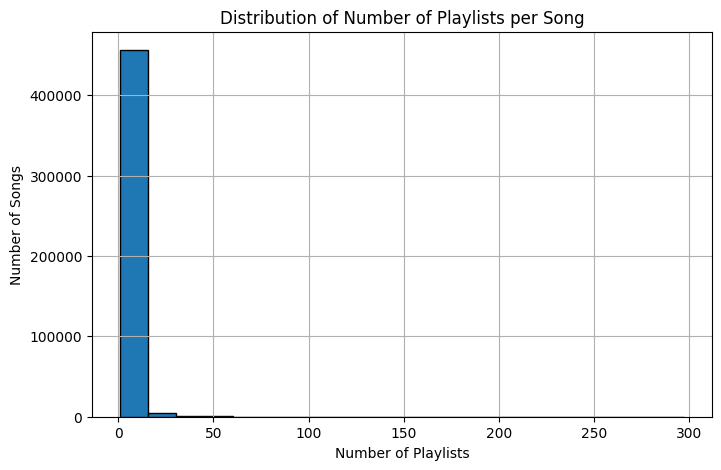

unq_playlist_name
1      318890
2       66810
3       26518
4       13776
5        8457
        ...  
167         1
132         1
150         1
216         1
168         1
Name: count, Length: 181, dtype: int64


In [4]:
import matplotlib.pyplot as plt

# מספר הפלייליסטים שכל שיר מופיע בהם
playlist_count_per_song = df_cleaned_final.groupby('song_name')['unq_playlist_name'].nunique()

# התפלגות
playlist_count_per_song.hist(bins=20, edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Number of Playlists per Song')
plt.xlabel('Number of Playlists')
plt.ylabel('Number of Songs')
plt.show()


# מספר השירים שמופיעים בלפחות X פלייליסטים
print(playlist_count_per_song.value_counts())


In [5]:
playlist_count_per_song

,unq_playlist_name
song_name,
(crosses) - +elepa+hy,1
(crosses) - +hholyghs+,1
(crosses) - +his is a +rick,3
(crosses) - +rophy,1
(crosses) - 1987,1
...,...
zztop - gimme all your loving,1
zzz - o.f.g.,1
~soundtrack - the return of the king,1


In [6]:
print(f"Total unique playlists: {df_cleaned_final['unq_playlist_name'].nunique()}")
print(f"Total unique songs: {df_cleaned_final['song_name'].nunique()}")


Total unique playlists: 25839
Total unique songs: 463072


In [7]:
playlist_count_per_song = df_cleaned_final.groupby('song_name')['unq_playlist_name'].nunique()
print(playlist_count_per_song.describe())
print(playlist_count_per_song.value_counts())


count    463072.000000
mean          2.264348
std           5.209216
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         297.000000
Name: unq_playlist_name, dtype: float64
unq_playlist_name
1      318890
2       66810
3       26518
4       13776
5        8457
        ...  
167         1
132         1
150         1
216         1
168         1
Name: count, Length: 181, dtype: int64


In [8]:
playlist_count_per_song = df_cleaned_final.groupby('song_name')['unq_playlist_name'].nunique()
print(playlist_count_per_song.describe())


count    463072.000000
mean          2.264348
std           5.209216
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         297.000000
Name: unq_playlist_name, dtype: float64


In [ ]:
"""
#Purpose: Ensures the model is trained on playlists with meaningful context (neither too small nor too large).
#Therefore, we filter playlists that include between 10 to 50 songs for efficient training.
#(Up to 25% of the playlists in this df have max 10 songs and Up to 80% of the playlists in the df have max 50 songs).

# Filter playlists with 10 to 50 songs
valid_playlists = songs_per_playlist[(songs_per_playlist >= 10) & (songs_per_playlist <= 50)].index

# Subset the DataFrame to include only these playlists
filtered_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(valid_playlists)]

filtered_df.to_csv("filtered_data.csv", index=False)



In [ ]:
df_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   user_id            1048575 non-null  object
 1   artist_name        1048575 non-null  object
 2   track_name         1048575 non-null  object
 3   playlist_name      1048575 non-null  object
 4   song_name          1048575 non-null  object
 5   unq_playlist_name  1048575 non-null  object
 6   track_word_count   1048575 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 56.0+ MB


In [9]:
#We know that some songs are too long and may harm the model recognition.

#Calculate average song name
filtered_df=df_cleaned_final

# חישוב אורך כל שם שיר
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב ממוצע אורך השמות
average_length = sum(song_name_lengths) / len(song_name_lengths)


print(f"Average length of song names: {average_length:.2f}")


#calculate the 80 percentile of song_name length
import numpy as np

# חישוב אורכי כל שמות השירים
song_name_lengths = [len(song) for song in filtered_df['song_name']]

# חישוב אחוזון ה-80
percentile_80 = np.percentile(song_name_lengths, 80)

# הדפסה של התוצאה
print(f"80th percentile of song name lengths: {percentile_80:.2f}")


#We define a max value for song_name lenght for the model
# הגדר אורך מקסימלי לשם השיר
max_length = 43

# סינון שמות ארוכים מהמילון
long_songs = [song for song in filtered_df['song_name'] if len(song) > max_length]
print(f"Number of long song names to exclude from the model: {len(long_songs)}")


short_songs = [song for song in filtered_df['song_name'] if len(song) <= max_length]
print(f"Number of song names to include in the model: {len(short_songs)}")


# Filter the DataFrame to include only short songs
filtered_short_df = filtered_df[filtered_df['song_name'].isin(short_songs)]
print(f"Number of rows in filtered_short_df: {filtered_short_df.shape[0]}")



Average length of song names: 34.25
80th percentile of song name lengths: 43.00
Number of long song names to exclude from the model: 205900
Number of song names to include in the model: 842675
Number of rows in filtered_short_df: 842675


In [10]:
#Generate Tokens
#Playlist-Song Tokens
#Purpose: Converts each playlist into a list of song names (tokens) for Word2Vec training

# Group songs by unique playlist names to create tokens
playlist_tokens = filtered_short_df.groupby('unq_playlist_name')['song_name'].apply(list).tolist()

print(f"Number of playlists: {len(playlist_tokens)}")
print("Example playlist tokens:", playlist_tokens[:1])

Number of playlists: 25236
Example playlist tokens: [['train - 50 ways to say goodbye', 'fall out boy - beat it', 'michael jackson - beat it - single version', 'foo fighters - best of you', 'n sync - bye bye bye', 'red hot chili peppers - californication', 'aqua - doctor jones', 'enrique iglesias - escape', 'five - everybody get up - radio edit', 'lenka - everything at once', 'britney spears - everytime', 'michelle branch - everywhere', 'roxette - fading like a flower', 'avril lavigne - fall to pieces', 'good charlotte - girls & boys', 'michael jackson - give in to me', "kiss - i was made for lovin' you", 'roxette - it must have been love', 'p!nk - just give me a reason', 'nightcore - let it burn', "five - let's dance - radio edit", 'r.e.m. - losing my religion', 'little mix - madhouse', 'genesis - mama', 'westlife - my love', 'n-dubz - no regrets - n-dubz version', 'bridgit mendler - ready or not', 'roxette - run to you', 'nelly furtado - say it right - main', 'will.i.am - scream & sh

In [11]:
#Train the Word2Vec Model # it takes  min to run
import time
#Purpose:
#Learns embeddings for songs and playlists, capturing their contextual relationships.
#Saves the trained model for reuse without retraining
# Start the timer
"""
Train Word2Vec Model
2.1 Import and Configure Word2Vec
Use Gensim’s Word2Vec model to train embeddings.
Configure parameters like vector_size, window, min_count, and epochs.
"""


from gensim.models import Word2Vec

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=playlist_tokens,  # Filtered tokens
    vector_size=100,            # Embedding dimensions
    window=5,                   # Context window size
    min_count=1,                # Minimum frequency of songs
    sg=1,                       # Skip-gram  model sg=1 :Suitable for larger datasets
    epochs=20,                  # Number of training epochs
    workers=4                   # Number of CPU threads
)

# Save the model
w2v_model.save("filtered_song2vec_short_songsall.model")

In [12]:
#Save the file here so u done need to rerun it
from google.colab import drive
drive.mount('/content/drive')

# Save to Google Drive
w2v_model.save('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec_short_songsall.model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Test the Trained Model

# Load the model if needed
from gensim.models import Word2Vec
w2v_model = Word2Vec.load('/content/drive/My Drive/Colab Notebooks/Final Project/filtered_song2vec_short_songsall.model')

# Find similar songs
input_song = "daft punk - get lucky"
if input_song in w2v_model.wv:
    similar_songs = w2v_model.wv.most_similar(input_song, topn=10)
    print(f"Songs similar to '{input_song}':")
    for song, similarity in similar_songs:
        print(f"{song} (similarity: {similarity:.2f})")
else:
    print(f"'{input_song}' not found in the model vocabulary.")

Songs similar to 'daft punk - get lucky':
daft punk - get lucky - radio edit (similarity: 0.93)
daft punk - giorgio by moroder (similarity: 0.91)
oscar aleman - tico tico no fuba (similarity: 0.90)
daft punk - give life back to music (similarity: 0.90)
the roots - don't say nuthin' - radio edit (similarity: 0.89)
sonny rollins - friday the 13th (similarity: 0.89)
willy moon - get up (what you need) (similarity: 0.89)
anna naklab - supergirl - radio edit (similarity: 0.88)
the noisy freaks - funky kids (similarity: 0.88)
viceroy - friday nights (bronx night dub) (similarity: 0.88)


In [14]:
#Recommend Playlists for a Song
def recommend_playlists(input_song, model, df):
    # Check if the song exists in the model
    if input_song not in model.wv:
        return "Song not found in model vocabulary."

    # Get similar songs
    similar_songs = [s for s, _ in model.wv.most_similar(input_song, topn=10)]

    # Filter playlists that contain similar songs
    recommended_playlists = df[df['song_name'].isin(similar_songs)]['unq_playlist_name'].unique()
    return recommended_playlists

# Example usage
input_song = "daft punk - get lucky"
playlists = recommend_playlists(input_song, w2v_model, df_cleaned_final)
print(f"Recommended playlists for '{input_song}':", playlists)



Recommended playlists for 'daft punk - get lucky': ['7511e45f2cc6f6e609ae46c15506538c - summering'
 'a807890a84273fb32d1eefd70916195c - blaser min rok'
 'a807890a84273fb32d1eefd70916195c - vastervik'
 '53a80b4f5d73275d7cc00cc78ec812cd - vem vet'
 '53a80b4f5d73275d7cc00cc78ec812cd - wow!!'
 '2e3f81500105f5080c161d3daea72bbe - roadtrip til vestlandet'
 '39140985921349a4f6ca6ca108544c3a - nytt'
 'b86510df7a1b78877f8ea6734f503c29 - play edm'
 'ee4c2080a04f5bba5176ce0bdd927f14 - 2014'
 'bb7d07f6f0085b99ab0dedc1e1fae091 - bicikli'
 'bb7d07f6f0085b99ab0dedc1e1fae091 - funkygroovymoodyrockdisco'
 '171f9f8447a0962f408c51201b76439e - anto'
 '5aa28d8a9543b3cfa69330942c27f7a5 - spring was late'
 'e4297c11550f9040baa20dc319256705 - random'
 'a978bcc7e3d706a7c2cef3f0008fd846 - starred'
 '156fd148c44f2bce755b09bf95985ee8 - electronic dance music'
 '156fd148c44f2bce755b09bf95985ee8 - top 2013'
 '156fd148c44f2bce755b09bf95985ee8 - world pop'
 '6cdb890a9fff57be31b072777350e632 - 2013'
 '6cdb890a9fff57be

In [ ]:
from collections import defaultdict

def create_playlist_similarity_map_optimized(filtered_short_df, min_overlap=1):
    # Map playlists to their songs
    playlist_to_songs = defaultdict(set)
    for playlist, songs in filtered_short_df.groupby('unq_playlist_name')['song_name']:
        playlist_to_songs[playlist] = set(songs)

    # Create similarity map
    similarity_map = defaultdict(set)
    playlist_names = list(playlist_to_songs.keys())

    for i in range(len(playlist_names)):
        for j in range(i + 1, len(playlist_names)):
            playlist_a = playlist_names[i]
            playlist_b = playlist_names[j]

            # Calculate overlap once
            overlap = len(playlist_to_songs[playlist_a].intersection(playlist_to_songs[playlist_b]))
            if overlap >= min_overlap:
                similarity_map[playlist_a].add(playlist_b)
                similarity_map[playlist_b].add(playlist_a)

    return similarity_map

# Create the optimized similarity map
playlist_similarity_map = create_playlist_similarity_map_optimized(filtered_short_df)
playlist_similarity_map




Buffered data was truncated after reaching the output size limit.

In [ ]:
# מספר הקשרים (connections) לכל פלייליסט
playlist_connections = {playlist: len(related_playlists) for playlist, related_playlists in playlist_similarity_map.items()}

# פלייליסטים עם הכי הרבה קשרים
most_connected = sorted(playlist_connections.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most connected playlists:", most_connected)


Top 10 most connected playlists: [('3b4253bf23b086cb88961667182d370c - favoritas de la radio', 7378), ('b34be9134a0cd0d5f2c02d7224c61b8d - liked from radio', 5760), ('c55fb8f1a42bedbcce1fffe26f403d4f - favoritas de la radio', 5731), ('72382b31f79adbe07435cc0d7d8dd781 - from the mess to the masses ', 5263), ('ee972bd8aafa9a46efd30540c7e2176b - summatime/fall', 5253), ('deb7336ef91f52b70b4fc1dcc9417b52 - varias', 5121), ('53a80b4f5d73275d7cc00cc78ec812cd - vem vet', 5120), ('731e39822fd86b016158700f90b1f4c9 - starred', 5064), ('1e54539c9134fd0a7d94ac7996a101bf - starred', 4918), ('156fd148c44f2bce755b09bf95985ee8 - world pop', 4905)]


In [ ]:
from sklearn.model_selection import train_test_split

# Split playlists into training and testing sets
playlists = df_cleaned_final['unq_playlist_name'].drop_duplicates()
train_playlists, test_playlists = train_test_split(playlists, test_size=0.2, random_state=42)

# Create train and test datasets
train_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(train_playlists)]
test_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(test_playlists)]


In [ ]:
# Generate playlist similarity map for the training set : it took 1:30 hour
train_similarity_map = create_playlist_similarity_map_optimized(train_df)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(test_df, train_similarity_map):
    y_true = []  # האם השיר באמת נמצא בפלייליסטים דומים
    y_pred = []  # האם המודל זיהה קשר

    # בדיקה עבור כל פלייליסט בסט הטסט
    for playlist in test_df['unq_playlist_name'].unique():
        # השירים בפלייליסט הנוכחי
        playlist_songs = set(test_df[test_df['unq_playlist_name'] == playlist]['song_name'])

        # פלייליסטים דומים לפי המודל
        predicted_playlists = train_similarity_map.get(playlist, set())
        predicted_songs = set(train_df[train_df['unq_playlist_name'].isin(predicted_playlists)]['song_name'])

        # יצירת y_true ו-y_pred
        for song in playlist_songs:
            y_true.append(1)  # השיר קיים בפלייליסט
            y_pred.append(1 if song in predicted_songs else 0)  # האם המודל זיהה אותו

    # חישוב מדדים
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Evaluate the model
precision, recall, f1 = evaluate_model(test_df, train_similarity_map)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


In [ ]:
print(f"Number of playlists in similarity map: {len(train_similarity_map)}")


Number of playlists in similarity map: 159054


In [ ]:
train_songs = set(train_df['song_name'])
test_songs = set(test_df['song_name'])
common_songs = train_songs.intersection(test_songs)
print(f"Number of common songs between train and test sets: {len(common_songs)}")


In [ ]:
for playlist, similar_playlists in list(train_similarity_map.items())[:5]:
    print(f"Playlist: {playlist}, Similar Playlists: {similar_playlists}")


NameError: name 'train_similarity_map' is not defined

In [ ]:
for playlist in test_df['unq_playlist_name'].unique():
    predicted_playlists = train_similarity_map.get(playlist, set())
    if not predicted_playlists:
        print(f"No predictions for playlist: {playlist}")


#similarity_map_with_cosine

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

def create_similarity_map_with_cosine(filtered_short_df, w2v_model, similarity_threshold=0.7):
    # Map playlists to their songs
    playlist_to_songs = filtered_short_df.groupby('unq_playlist_name')['song_name'].apply(list)

    # Compute vector representation for each playlist
    playlist_vectors = {}
    for playlist, songs in playlist_to_songs.items():
        # Filter songs available in the Word2Vec model
        song_vectors = [w2v_model.wv[song] for song in songs if song in w2v_model.wv]
        if song_vectors:
            # Average vector representation of the playlist
            playlist_vectors[playlist] = np.mean(song_vectors, axis=0)

    # Create similarity map
    similarity_map = defaultdict(set)
    playlist_names = list(playlist_vectors.keys())

    for i in range(len(playlist_names)):
        for j in range(i + 1, len(playlist_names)):
            playlist_a = playlist_names[i]
            playlist_b = playlist_names[j]

            # Calculate cosine similarity
            similarity = cosine_similarity(
                [playlist_vectors[playlist_a]],
                [playlist_vectors[playlist_b]]
            )[0][0]

            if similarity >= similarity_threshold:
                similarity_map[playlist_a].add(playlist_b)
                similarity_map[playlist_b].add(playlist_a)

    return similarity_map

# Create the optimized similarity map using cosine similarity
playlist_similarity_map = create_similarity_map_with_cosine(filtered_short_df, w2v_model)
print(f"Number of playlists in similarity map: {len(playlist_similarity_map)}")


In [ ]:
from sklearn.model_selection import train_test_split

# Split playlists into training and testing sets
playlists = df_cleaned_final['unq_playlist_name'].drop_duplicates()
train_playlists, test_playlists = train_test_split(playlists, test_size=0.2, random_state=42)

# Create train and test datasets
train_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(train_playlists)]
test_df = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(test_playlists)]


In [ ]:
train_similarity_map = create_similarity_map_with_cosine(train_df, w2v_model, threshold=0.7)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model_with_cosine(test_df, train_similarity_map, train_df):
    y_true = []
    y_pred = []

    for playlist in test_df['unq_playlist_name'].unique():
        # Get the songs in the current test playlist
        playlist_songs = set(test_df[test_df['unq_playlist_name'] == playlist]['song_name'])

        # Get predicted playlists based on the similarity map
        predicted_playlists = train_similarity_map.get(playlist, set())

        # Aggregate all songs in the predicted playlists
        predicted_songs = set(train_df[train_df['unq_playlist_name'].isin(predicted_playlists)]['song_name'])

        # Compare actual and predicted songs
        for song in playlist_songs:
            y_true.append(1)  # Song is in the playlist
            y_pred.append(1 if song in predicted_songs else 0)  # Predicted correctly or not

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1


In [ ]:
precision, recall, f1 = evaluate_model_with_cosine(test_df, train_similarity_map, train_df)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
